In [9]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [10]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [11]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    # TODO: Load CSV with correct separator
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    # TODO: Select features
    X = df[features]
    
    # TODO: Scale the features
    scaler = StandardScaler()
    # TODO: Apply StandardScaler
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


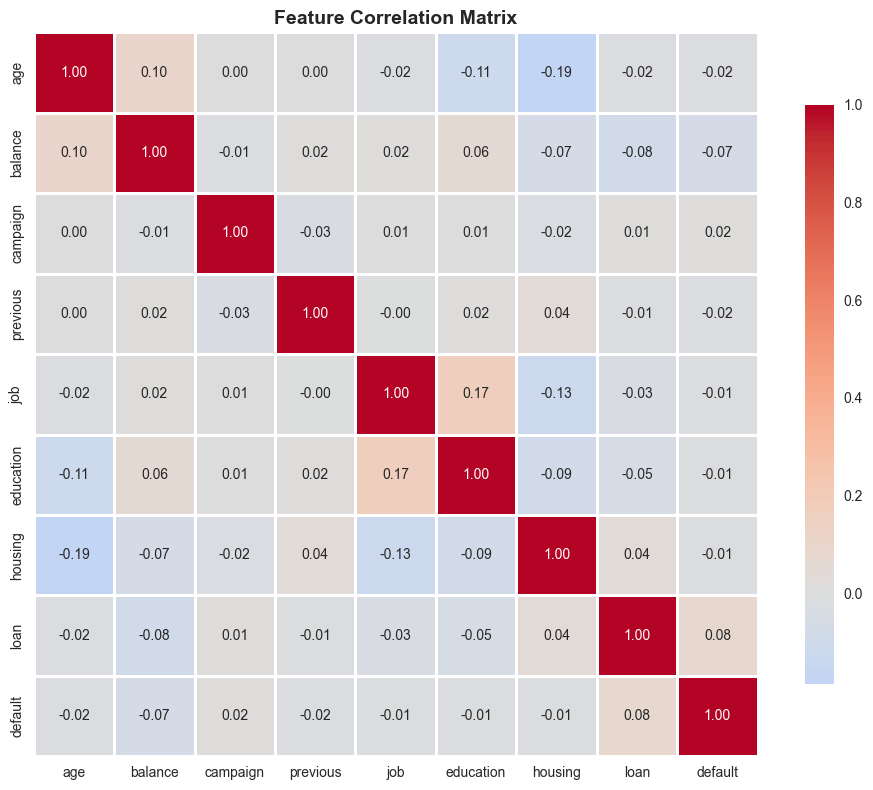

In [12]:
# Feature Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[['age', 'balance', 'campaign', 'previous', 'job', 'education', 
                           'housing', 'loan', 'default']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [13]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = cluster_points.mean(axis=0)
            else:
                centroids[i] = self.centroids[i]
        return centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            
            if np.allclose(self.centroids, new_centroids, rtol=1e-6):
                break
                
            self.centroids = new_centroids
        
        self.labels = labels
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

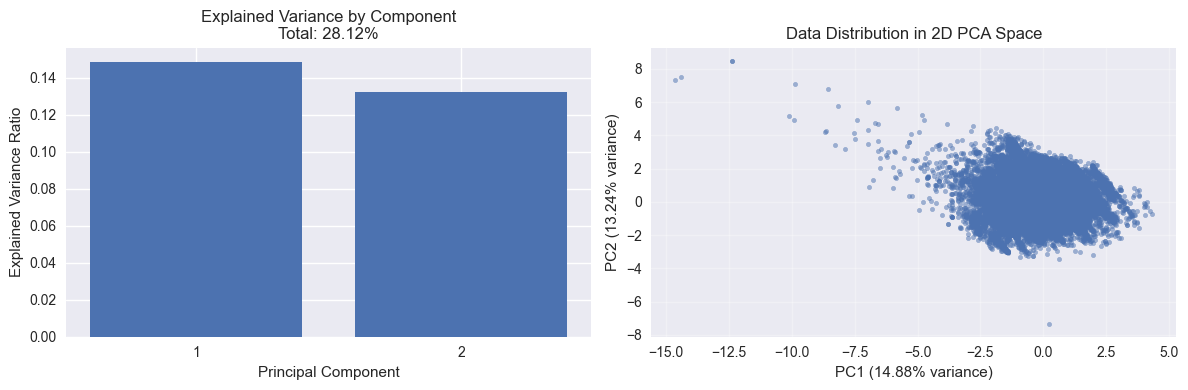

Shape after PCA: (45211, 2)


In [14]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # TODO: Create visualization
    plt.figure(figsize=(12, 4))
    
    # Plot explained variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Explained Variance by Component\nTotal: {pca.explained_variance_ratio_.sum():.2%}')
    plt.xticks(range(1, n_components + 1))
    
    # Plot data in 2D
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.title('Data Distribution in 2D PCA Space')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

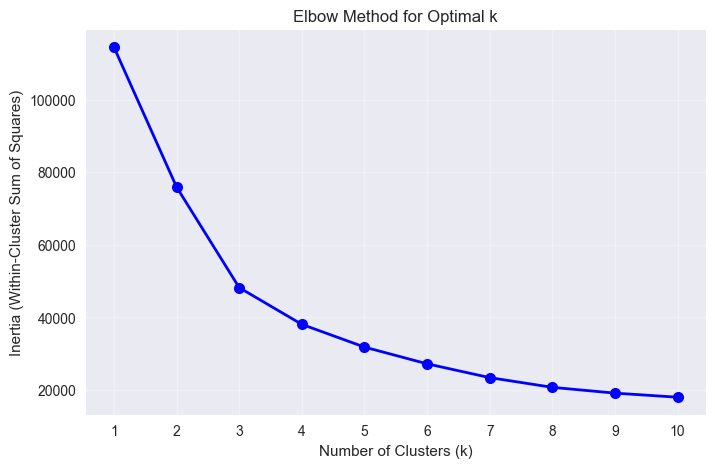

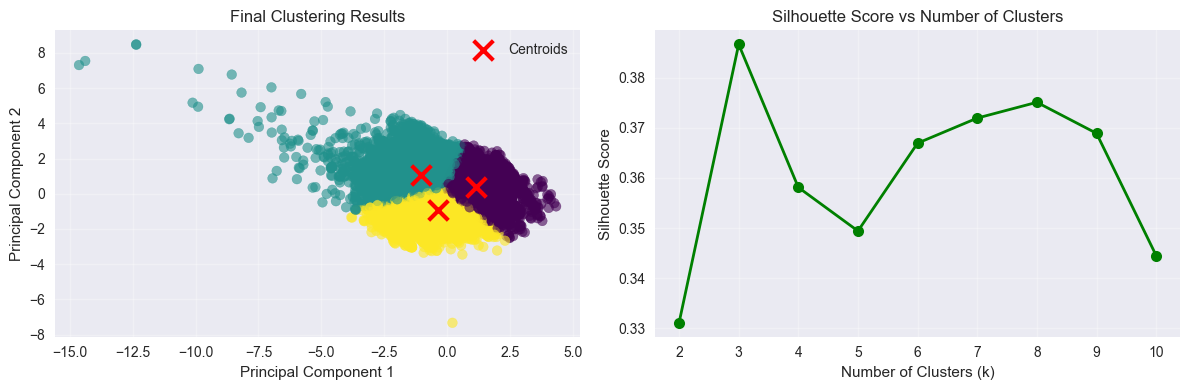


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [15]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    
    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
            inertia += np.sum(distances ** 2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    
    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    inertias = []
    K = range(1, max_k + 1)
    
    # Calculate inertia for different k values
    for k in K:
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)
    
    # Create elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True, alpha=0.3)
    plt.xticks(K)
    plt.show()
    
    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Final Clustering Results')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot evaluation metrics
plt.subplot(1, 2, 2)
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    km = KMeansClustering(n_clusters=k, random_state=42)
    km.fit(X_pca)
    score = silhouette_score(X_pca, km.labels)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

/var/folders/pt/3f3p71yn6yz977k4h6hkbm280000gn/T/ipykernel_74168/1129916757.py:10: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
/var/folders/pt/3f3p71yn6yz977k4h6hkbm280000gn/T/ipykernel_74168/1129916757.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(cluster_silhouette_data, labels=unique_labels, patch_artist=True,
/var/folders/pt/3f3p71yn6yz977k4h6hkbm280000gn/T/ipykernel_74168/1129916757.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(cluster_silhouette_data, labels=unique_labels, patch_a

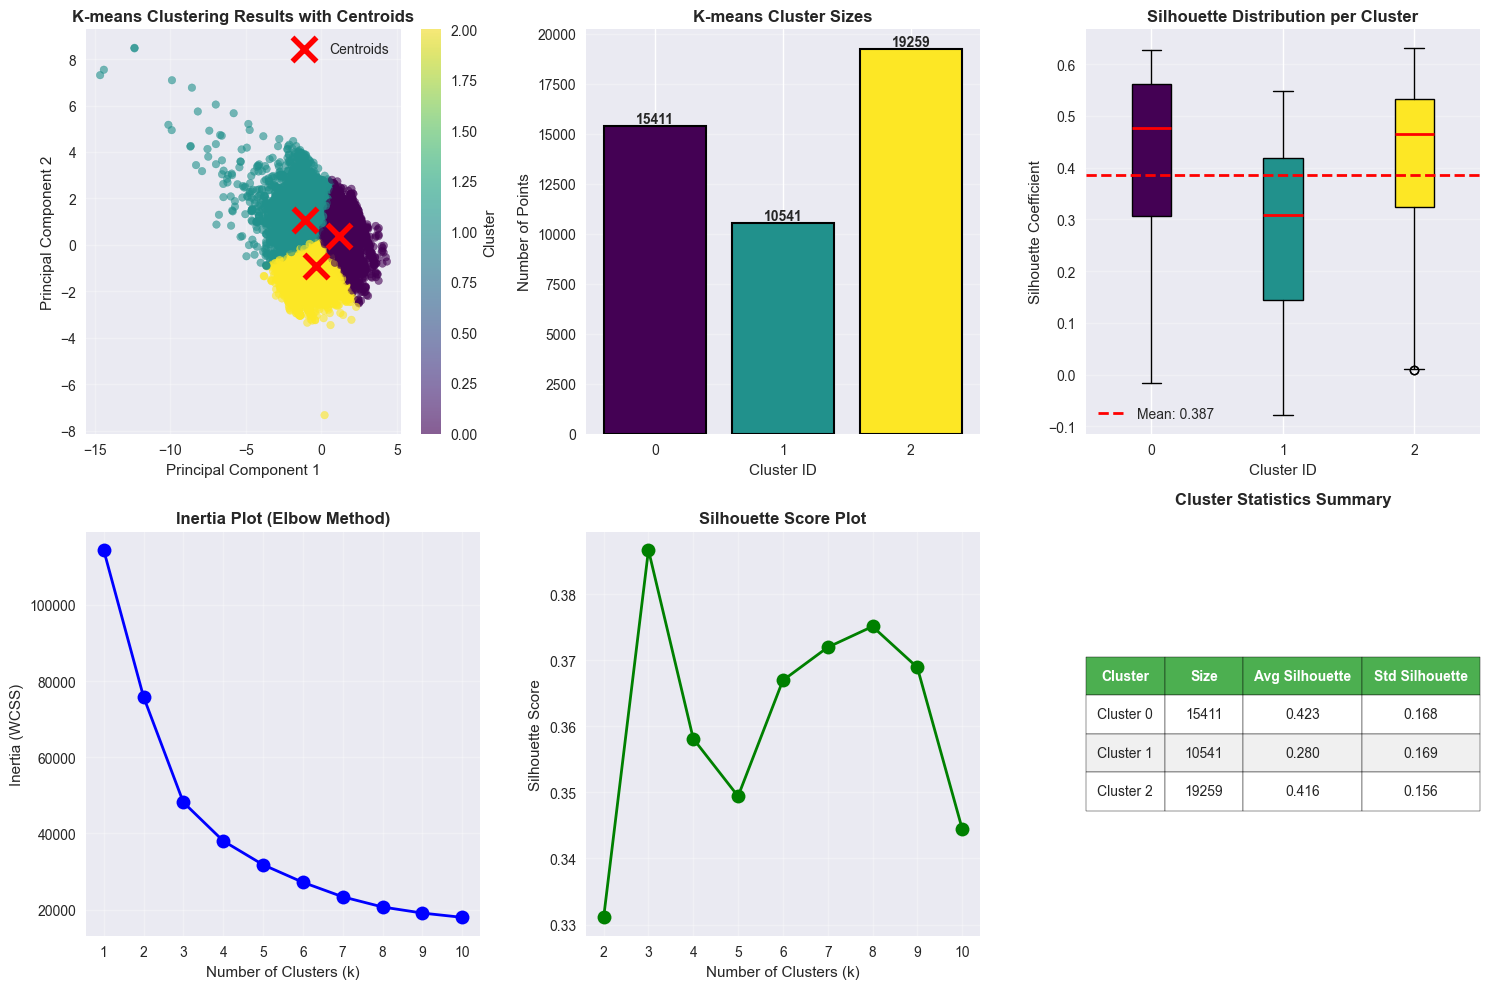


K-MEANS CLUSTERING SUMMARY
Number of Clusters: 3
Total Inertia: 48179.64
Overall Silhouette Score: 0.387

Cluster Distribution:
  Cluster 0: 15411 points (34.1%)
  Cluster 1: 10541 points (23.3%)
  Cluster 2: 19259 points (42.6%)
Overall Silhouette Score: 0.387

Cluster Distribution:
  Cluster 0: 15411 points (34.1%)
  Cluster 1: 10541 points (23.3%)
  Cluster 2: 19259 points (42.6%)


In [16]:
# Additional K-means Analysis and Visualizations
from sklearn.metrics import silhouette_samples

# Create comprehensive visualization
fig = plt.figure(figsize=(15, 10))

# 1. K-means Clustering Results with Centroids (already done above, redoing for clarity)
ax1 = plt.subplot(2, 3, 1)
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6, s=30)
ax1.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=300, linewidths=4, label='Centroids', edgecolors='black')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('K-means Clustering Results with Centroids', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Cluster')

# 2. Cluster Sizes (Bar Plot)
ax2 = plt.subplot(2, 3, 2)
unique_labels, counts = np.unique(kmeans.labels, return_counts=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
bars = ax2.bar(unique_labels, counts, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Cluster ID')
ax2.set_ylabel('Number of Points')
ax2.set_title('K-means Cluster Sizes', fontweight='bold')
ax2.set_xticks(unique_labels)
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(count)}', ha='center', va='bottom', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Silhouette Distribution per Cluster (Box Plot)
ax3 = plt.subplot(2, 3, 3)
silhouette_vals = silhouette_samples(X_pca, kmeans.labels)
cluster_silhouette_data = [silhouette_vals[kmeans.labels == i] for i in unique_labels]
bp = ax3.boxplot(cluster_silhouette_data, labels=unique_labels, patch_artist=True,
                  medianprops=dict(color='red', linewidth=2),
                  boxprops=dict(facecolor='lightblue', edgecolor='black'),
                  whiskerprops=dict(color='black'),
                  capprops=dict(color='black'))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax3.set_xlabel('Cluster ID')
ax3.set_ylabel('Silhouette Coefficient')
ax3.set_title('Silhouette Distribution per Cluster', fontweight='bold')
ax3.axhline(y=silhouette_score(X_pca, kmeans.labels), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {silhouette_score(X_pca, kmeans.labels):.3f}')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Inertia Plot (Elbow Method)
ax4 = plt.subplot(2, 3, 4)
K_vals = range(1, 11)
ax4.plot(K_vals, inertias, 'bo-', linewidth=2, markersize=10)
ax4.set_xlabel('Number of Clusters (k)')
ax4.set_ylabel('Inertia (WCSS)')
ax4.set_title('Inertia Plot (Elbow Method)', fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_xticks(K_vals)

# 5. Silhouette Score Plot
ax5 = plt.subplot(2, 3, 5)
ax5.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=10)
ax5.set_xlabel('Number of Clusters (k)')
ax5.set_ylabel('Silhouette Score')
ax5.set_title('Silhouette Score Plot', fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.set_xticks(k_range)

# 6. Cluster Statistics Table
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
cluster_stats = []
for i in unique_labels:
    cluster_silhouette = silhouette_vals[kmeans.labels == i]
    cluster_stats.append([
        f'Cluster {i}',
        counts[i],
        f'{cluster_silhouette.mean():.3f}',
        f'{cluster_silhouette.std():.3f}'
    ])

table_data = [['Cluster', 'Size', 'Avg Silhouette', 'Std Silhouette']] + cluster_stats
table = ax6.table(cellText=table_data, cellLoc='center', loc='center',
                   colWidths=[0.2, 0.2, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style data rows with alternating colors
for i in range(1, len(cluster_stats) + 1):
    for j in range(4):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')
        table[(i, j)].set_edgecolor('black')

ax6.set_title('Cluster Statistics Summary', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("K-MEANS CLUSTERING SUMMARY")
print("="*60)
print(f"Number of Clusters: {len(unique_labels)}")
print(f"Total Inertia: {inertia:.2f}")
print(f"Overall Silhouette Score: {silhouette_score(X_pca, kmeans.labels):.3f}")
print("\nCluster Distribution:")
for i, count in zip(unique_labels, counts):
    print(f"  Cluster {i}: {count} points ({count/len(kmeans.labels)*100:.1f}%)")
print("="*60)

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [17]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        from sklearn.cluster import KMeans
        
        labels = np.zeros(X.shape[0], dtype=int)
        next_label = 1
        
        self.centers_[0] = X.mean(axis=0)
        
        while len(np.unique(labels)) < self.n_clusters:
            unique_labels, counts = np.unique(labels, return_counts=True)
            largest_cluster = unique_labels[np.argmax(counts)]
            
            cluster_mask = labels == largest_cluster
            cluster_points = X[cluster_mask]
            
            kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = kmeans.fit_predict(cluster_points)
            
            new_label = next_label
            next_label += 1
            
            indices = np.where(cluster_mask)[0]
            for i, idx in enumerate(indices):
                if sub_labels[i] == 1:
                    labels[idx] = new_label
            
            self.split_tree[largest_cluster] = (largest_cluster, new_label)
            
            self.centers_[largest_cluster] = kmeans.cluster_centers_[0]
            self.centers_[new_label] = kmeans.cluster_centers_[1]
        
        self.labels_ = labels
        return labels

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!